# Assess portfolio
ML for trading  Udacity Course exercise

"""Analyze a portfolio.
http://quantsoftware.gatech.edu/Assess_portfolio

Copyright 2018, Kairoart
"""


## Overview

A portfolio is a collection of stocks (or other assets) and corresponding allocations of funds to each of them. In order to evaluate and compare different portfolios, we first need to compute certain metrics, based on available historical data.

The primary goal of this assignment is to introduce you to this form of portfolio analysis. You will use pandas for reading in data, calculating various statistics and plotting a comparison graph.

## Task
Create a function called assess_portfolio() that takes as input a description of a portfolio and computes important statistics about it.

You are given the following inputs for analyzing a portfolio:

* A date range to select the historical data to use (specified by a start and end date). You should consider performance from close of the start date to close of the end date.
* Symbols for equities (e.g., GOOG, AAPL, GLD, XOM). Note: You should support any symbol in the data directory.
* Allocations to the equities at the beginning of the simulation (e.g., 0.2, 0.3, 0.4, 0.1), should sum to 1.0.
* Total starting value of the portfolio (e.g. $1,000,000)

## Goal

Your goal is to compute the daily portfolio value over given date range, and then the following statistics for the overall portfolio:

* cr = Cumulative return
* adr = Average period return (if sampling frequency == 252 then this is average daily return)
* sddr = Standard deviation of daily returns
* sr = Sharpe ratio of the overall portfolio, given daily risk free rate (usually 0), and yearly sampling * frequency (usually 252, the no. of trading days in a year)
* ev = Ending value of the portfolio

## Import libraries

In [29]:
import pandas as pd
import numpy as np
import datetime as dt
import math

# Add parent directory PATH for looking for modules,
import sys
sys.path.insert(0,'..')
from util import get_data, plot_data

In [118]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG','AAPL','GLD','XOM']
allocs=[0.2, 0.3, 0.4, 0.1]
sv=1000000
rfr=0.0
sf=252.0
   

# Read in adjusted closing prices for given symbols, date range
dates = pd.date_range(sd, ed)
prices_all = get_data(syms, dates)  # automatically adds SPY
prices = prices_all[syms]
prices_SPY = prices_all['SPY']

# Get daily portfolio value
# 1. Normalize the prices
normed = pd.DataFrame(index=prices.index)
for column in prices:
    normed[column] = prices[column].values / prices[column].iloc[0];
#print(normed)

# 2. Alloced
alloced = pd.DataFrame(index=prices.index)
alloced = normed * allocs
#print(alloced)

# 3. pos_vals = alloced * start vals
pos_vals = pd.DataFrame(index=prices.index)
for column in alloced:
    pos_vals[column] = alloced[column] * sv
pos_vals['pos_vals'] = pos_vals.iloc[:,-4:].sum(axis=1)
#print(pos_vals)

# 4. port_val = 
port_val = pd.DataFrame(index=prices.index)
port_val[['pos_vals']] = pos_vals[['pos_vals']]
#print(port_val)

# 4. Daily returns
daily_rets = port_val.pct_change(1)
#print(daily_rets)

# Get portfolio statistics (note: std_daily_ret = volatility)
# 1. Cumulative return
cr = (port_val['pos_vals'][-1] / port_val['pos_vals'][0] - 1)

# 2. Averrage daily returns
adr = daily_rets.mean()
# 3. Standard deviation of daily returns
sddr = std_daily_ret = daily_rets.std()
# 4. Sharpe ratio
sr = adr / sddr
k = math.sqrt(252)
sr = k * sr

# add code to plot here
# Normalize port_val
x = port_val['pos_vals'][0]
port_val = port_val.divide(x, fill_value=1)

# Normalize SPY
x = prices_SPY[0]
prices_SPY = prices_SPY.divide(x, fill_value=1)


df_temp = pd.concat([port_val, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
df_temp

,Portfolio,SPY
,pos_vals,SPY
2010-01-04,1.000000,1.000000
2010-01-05,0.999649,1.002678
2010-01-06,0.997318,1.003417
2010-01-07,0.989412,1.007666
2010-01-08,0.995497,1.010991
2010-01-11,0.999111,1.012376
2010-01-12,0.983259,1.002956
2010-01-13,0.989711,1.011453
2010-01-14,0.990674,1.014131


In [138]:
# This is the function that will be tested by the autograder
# The student must update this code to properly implement the functionality
def assess_portfolio(sd = dt.datetime(2008,1,1), ed = dt.datetime(2009,1,1), \
    syms = ['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices = prices_all[syms]  # only portfolio symbols
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later

    
    # Get daily portfolio value
    # 1. Normalize the prices
    normed = pd.DataFrame(index=prices.index)
    for column in prices:
        normed[column] = prices[column].values / prices[column].iloc[0];
    #print(normed)

    # 2. Alloced
    alloced = pd.DataFrame(index=prices.index)
    alloced = normed * allocs
    #print(alloced)

    # 3. pos_vals = alloced * start vals
    pos_vals = pd.DataFrame(index=prices.index)
    for column in alloced:
        pos_vals[column] = alloced[column] * sv
    pos_vals['pos_vals'] = pos_vals.iloc[:,-4:].sum(axis=1)
    #print(pos_vals)

    # 4. port_val = 
    port_val = pd.DataFrame(index=prices.index)
    port_val[['pos_vals']] = pos_vals[['pos_vals']]
    #print(port_val)

    # 4. Daily returns
    daily_rets = port_val.pct_change(1)
    #print(daily_rets)

    # Get portfolio statistics (note: std_daily_ret = volatility)
    # 1. Cumulative return
    cr = (port_val['pos_vals'][-1] / port_val['pos_vals'][0] - 1)

    # 2. Averrage daily returns
    adr = daily_rets.mean()
    # 3. Standard deviation of daily returns
    sddr = std_daily_ret = daily_rets.std()
    # 4. Sharpe ratio
    sr = adr / sddr
    k = math.sqrt(252)
    sr = k * sr
    
    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        # Normalize port_val
        x = port_val['pos_vals'][0]
        port_val = port_val.divide(x, fill_value=1)
        port_val.rename(columns={'pos_vals': ''}, inplace=True)
        
        # Normalize SPY
        x = prices_SPY[0]
        prices_SPY = prices_SPY.divide(x, fill_value=1)
        prices_SPY.rename(columns={'SPY': ''}, inplace=True)

        df_temp = pd.concat([port_val, prices_SPY], 
                             keys=['Portfolio', 'SPY'], axis=1)
        df_temp.plot()
        
    #print(df_temp)
    # Add code here to properly compute end value
    ev = sv

    return cr, adr, sddr, sr, ev

def test_code():
    # This code WILL NOT be tested by the auto grader
    # It is only here to help you set up and test your code

    # Define input parameters
    # Note that ALL of these values will be set to different values by
    # the autograder!
    start_date = dt.datetime(2009,1,1)
    end_date = dt.datetime(2010,1,1)
    symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
    allocations = [0.2, 0.3, 0.4, 0.1]
    start_val = 1000000  
    risk_free_rate = 0.0
    sample_freq = 252

    # Assess the portfolio
    cr, adr, sddr, sr, ev = assess_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        allocs = allocations,\
        sv = start_val, \
        gen_plot = False)

    # Print statistics
    print("Start Date:"), start_date
    print("End Date:"), end_date
    print("Symbols:"), symbols
    print("Allocations:"), allocations
    print("Sharpe Ratio:"), sr
    print("Volatility (stdev of daily returns):"), sddr
    print("Average Daily Return:"), adr
    print("Cumulative Return:"), cr

(-0.21335690576989064, pos_vals   -0.000743
 dtype: float64, pos_vals    0.020501
 dtype: float64, pos_vals   -0.575678
 dtype: float64, 1000000)

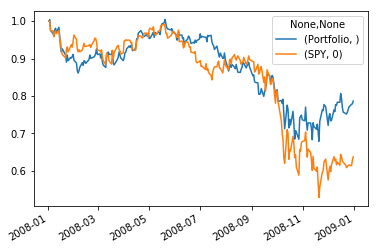

In [139]:
assess_portfolio(gen_plot=True)